# Titanic: Died or Survived? 

The following notebook goes about the Titanic dataset and it aims to predict whether the passenger die or survive the catastrophe.

First we import the esential libraries in order to read the data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have 891 registers and 12 columns in the train set.

In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We have 418 registers and 11 columns in the test set. The missing column is the Survived column which makes sense since this will be our target variable.
The missing column is in the gender submission csv:

In [4]:
submission = pd.read_csv('gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Once we have read all of it, let's check out the data.

## 1. Data Review

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


Let's describe the dataset's columns:

* PassengerId: a number that identifies each passenger.
* Survived: indicates if the passenger survived (1) or not (0).
* Pclass: 1st, 2nd and 3rd class.
* Name: Full Name of the Passenger.
* Sex: Sexo of the Passenger.
* Age: Age of the Passenger
* SibSp: Number of sibling or spose aboard.
* Parch: Number of parents or children aboard
* Ticket: Type of ticket bought for the journey (?) 
* Fare: Price of the Ticket they bought.
* Cabin: I have no idea, but it will not matter as we will see. 
* Embarked: The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown

## 3. Statistical Analysis

For this analysis we will concatenate the train and test set: 

In [8]:
y_test = submission.Survived
test['Survived'] = y_test

y_train = train['Survived']
train = train.drop('Survived', 1)
train['Survived'] = y_train

In [9]:
data = pd.concat([train, test], ignore_index= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Survived       1309 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


Since Passenger Id is redundant information let's drop it:

In [10]:
data.drop('PassengerId', 1, inplace = True)

Let's analyze the age column:

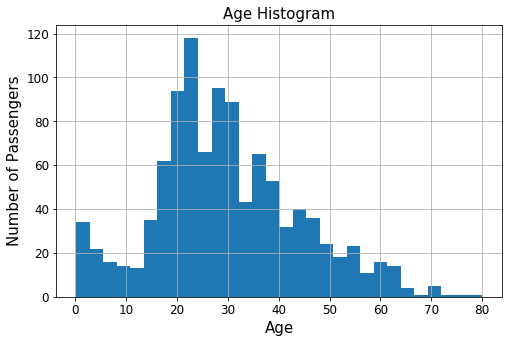

In [11]:
plt.figure(figsize = (8,5))
data.Age.hist(bins = 30)
plt.title('Age Histogram', fontsize = 15)
plt.ylabel('Number of Passengers', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

In [12]:
data.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

The mean Age is 30 and the 25% of the crew is less than 21 years. 

In [13]:
t = data.groupby('Sex')['Survived'].sum().sum()/len(data)*100

In [14]:
print('Only the %1.2f' %t + ' per cent of the passengers survived.' ) 

Only the 37.74 per cent of the passengers survived.


In [15]:
data.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum()/len(x)*100)

,Survived
Sex,
female,82.618026
male,12.930012


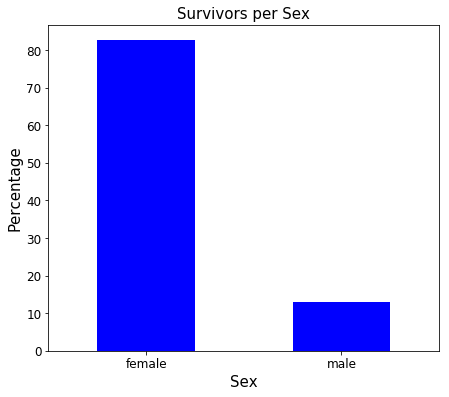

In [16]:
plt.figure(figsize=(7,6))
data.groupby('Sex')['Survived'].aggregate(lambda x: x.sum()/len(x)*100).plot.bar(color = 'blue')
plt.title('Survivors per Sex', fontsize = 15)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12);

Eighty percent of women who where on the Titanic survived meanwhile only 12 percent of men in the Titanic survived as well.

In [17]:
data.groupby(['Sex'])[['Pclass']].count()

,Pclass
Sex,
female,466
male,843


There were a lot more males than females in the Titanic.

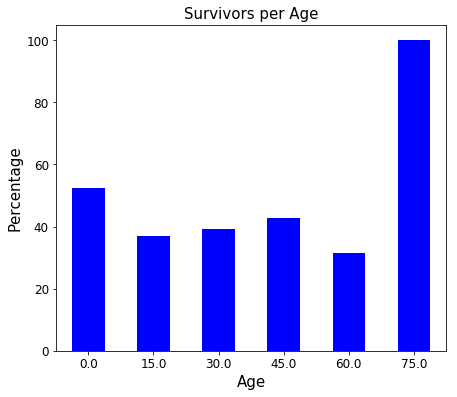

In [18]:
plt.figure(figsize=(7,6))
data.groupby(data.Age // 15 * 15)['Survived'].aggregate(lambda x: x.sum()/ len(x)*100).plot.bar(color = 'blue')
plt.title('Survivors per Age', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12);

As we see, children from 0 to 15 years were more likely to survive in the Titanic. We have 100% more than 75-years-old survivors because there were only one 80-years-old passenger and he survived. Now we present the same graph but in number of Survivors instead of percentage:

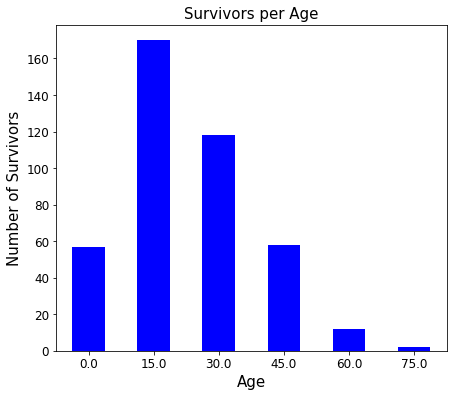

In [19]:
plt.figure(figsize=(7,6))
data.groupby(data.Age // 15 * 15)['Survived'].aggregate(lambda x: x.sum()).plot.bar(color = 'blue')
plt.title('Survivors per Age', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of Survivors', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12);

The mean age in the Titanic was 21 years, so that the larger number of survivors were between 15 and 20 makes sense. 

Now we analyse the Classes:

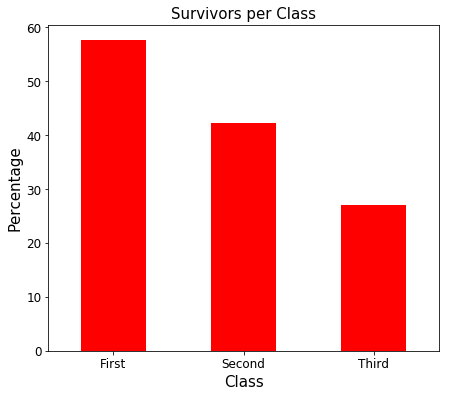

In [20]:
plt.figure(figsize=(7,6))
data.groupby(data.Pclass)['Survived'].aggregate(lambda x: x.sum()/ len(x)*100).plot.bar(color = 'red')
plt.title('Survivors per Class', fontsize = 15)
plt.xlabel('Class', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.xticks(range(3), ['First', 'Second', 'Third'],fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12);

As we see, it is more likely to survive if you are in First Class. Now the same but in number of survivors:

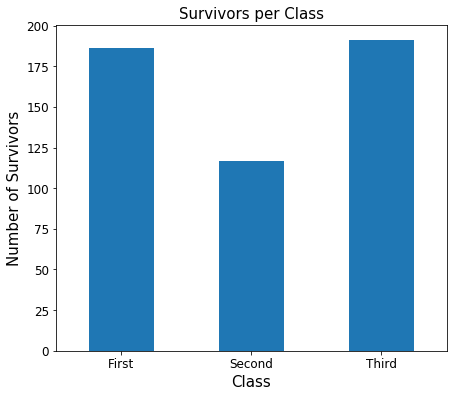

In [21]:
plt.figure(figsize=(7,6))
data.groupby(data.Pclass)['Survived'].aggregate(lambda x: x.sum()).plot.bar()
plt.title('Survivors per Class', fontsize = 15)
plt.xlabel('Class', fontsize = 15)
plt.ylabel('Number of Survivors', fontsize = 15)
plt.xticks(range(3), ['First', 'Second', 'Third'],fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12);

It seems strange that there more survivors from Third than from Second Class. Let's check it:

In [22]:
data.groupby(['Pclass'])[['Name']].count()

,Name
Pclass,
1,323
2,277
3,709


As we see there were a lot more passengers in third class than in second class, so it make sense that there were more survivors. Now let's group by Pclass and by Sex: 

In [23]:
data.groupby(['Pclass', 'Sex'])[['Survived']].sum()

Survived
Pclass Sex             
1      female       141
       male          45
2      female       100
       male          17
3      female       144
       male          47

<Figure size 504x432 with 0 Axes>

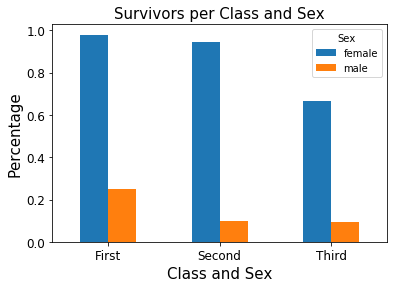

In [24]:
plt.figure(figsize=(7,6))
data.groupby(['Pclass', 'Sex'])['Survived'].aggregate(lambda x: x.sum()/len(x)).unstack().plot.bar()
plt.title('Survivors per Class and Sex', fontsize = 15)
plt.xlabel('Class and Sex', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.xticks(range(3), ['First', 'Second', 'Third'],fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12);

From this, we can infer that the determinant feature to survive is to be a woman. Also in first and second class almost all women survived and in third class less women did it. Meanwhile, men were more likely to survive when they were traveling at First Class.

## 3. Dealing with Missing Data

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Survived    1309 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


So we have nulls in Cabin, Embarked, Age and Fare features. We have to fix them.

In [26]:
t = train.isnull().sum().sort_values(ascending = False)/len(train) * 100
print('The percentage of missing data per feature in the train data is:')
t

The percentage of missing data per feature in the train data is:


Cabin          77.104377
Age            19.865320
Embarked        0.224467
Survived        0.000000
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
PassengerId     0.000000
dtype: float64

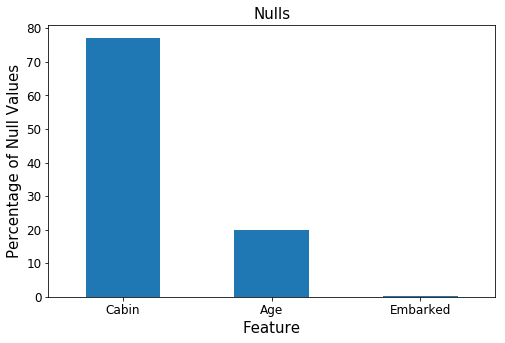

In [27]:
plt.figure(figsize = (8,5))
t.head(3).plot.bar()
plt.title('Nulls', fontsize = 15)
plt.ylabel('Percentage of Null Values', fontsize = 15)
plt.xlabel('Feature', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12);

The categorical feature Embarked has only 0.22 % of nulls so fill the NAN with the mode should be enough. Regarding to Cabin it seems likely that this nulls correpond to passengers without Cabin, so we shall replace those nulls with a new categorical value named 'None'. At last, Age has 20% of nulls so we need a deeper review in order to decide how to fix it.

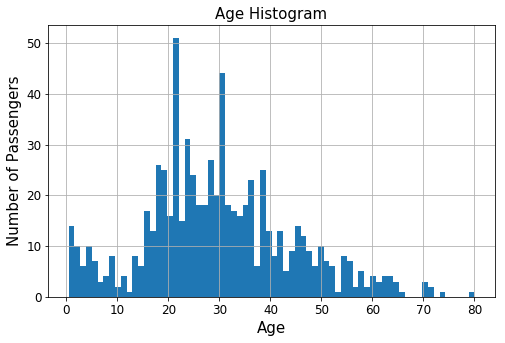

In [28]:
plt.figure(figsize = (8,5))
train.Age.hist(bins = 70)
plt.title('Age Histogram', fontsize = 15)
plt.ylabel('Number of Passengers', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

In [29]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

According to what we know about the Titanic, in terms of the age, it's more likely to survive for children. So, as long we don't replace these null-values for a very low number we will not have any trouble. Let's take the mean to fill the nulls in this feature. 

In the test set we have a single null in the Fare Feature. We will replace it by the mean value. 

Now we will fix the missing data in train and test:

In [30]:
train.Cabin = train.Cabin.fillna('None')
test.Cabin = test.Cabin.fillna('None')

In [31]:
train.Age = train.Age.fillna(round(train.Age.mean(),0))
test.Age = test.Age.fillna(round(train.Age.mean(),0))

In [32]:
train.Embarked = train.Embarked.fillna(train.Embarked.mode()[0])
test.Embarked = test.Embarked.fillna(test.Embarked.mode()[0])

In [33]:
test.Fare = test.Fare.fillna(test.Fare.mean())

In [34]:
train.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

In [35]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

So we have fix the missing data problem.

## 4. Creation of New Features 

Owing to the code of conduct "Women and children first" whereby the lives of women and children were to be saved first in a life-threatening situation, it may be a good idea to create a variable stages_of_life with the values 'children' and 'adult or senior'.

In [36]:
train['stages_of_life'] = 0
test['stages_of_life'] = 0 

In [37]:
ind = train[train['Age'] < 18].index
train.stages_of_life.iloc[ind] = 'Children'

ind = train[train['Age'] >= 18].index
train.stages_of_life.iloc[ind] = 'Adult'

ind = test[test['Age'] < 18].index
test.stages_of_life.iloc[ind] = 'Children'

ind = test[test['Age'] >= 18].index
test.stages_of_life.iloc[ind] = 'Adult'


C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


It will be also useful to define a new varible named "Family Size" and an "Alone" variable: 

In [38]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['Alone'] = 0
train['Alone'].loc[train['FamilySize'] > 1] = 1

C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [39]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['Alone'] = 0
test['Alone'].loc[train['FamilySize'] > 1] = 1

C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## 5. Picking Train and Test Set

In [40]:
train.Pclass = train.Pclass.astype(str)
test.Pclass = test.Pclass.astype(str)

Let's drop the PassengerId, Name, Ticket, Survived columns from the train and test set to form X_train and X_test: 

In [41]:
X_train = train.drop(['PassengerId', 'Name', 'Ticket', 'Survived', 'Cabin'],1)
X_test = test.drop(['PassengerId', 'Name', 'Ticket', 'Survived','Cabin'],1)

In [42]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [43]:
X_train.head()

,Age,SibSp,Parch,Fare,FamilySize,Alone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,stages_of_life_Adult,stages_of_life_Children
0,22.0,1,0,7.2500,2,1,0,0,1,0,1,0,0,1,1,0
1,38.0,1,0,71.2833,2,1,1,0,0,1,0,1,0,0,1,0
2,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,1,0
3,35.0,1,0,53.1000,2,1,1,0,0,1,0,0,0,1,1,0
4,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,1,0


## 5. Machine Learning

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, log_loss
import scikitplot as skplt

In [45]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


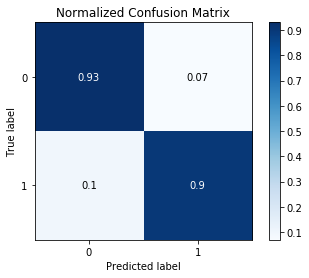

In [46]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_lr, normalize = True)

In [47]:
print('Area under the ROC curve:',"% 1.3f" % roc_auc_score(y_test,y_pred_lr))

Area under the ROC curve:  0.915


In [48]:
print('Log Loss: %1.3f' % log_loss(y_test,y_pred_lr))

Log Loss: 2.809


Our metrics give us terrific numbers, so the model performs quite well.

### Classification Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
#Tamaño grid depth
ND = 4
min_depth = 1
max_depth = 4
grid_depth = np.linspace(min_depth,max_depth,ND).astype('int')
# tamaño grid ntrees
NT = 9
min_trees = 100
max_trees = 900
grid_tree = np.linspace(min_trees, max_trees, NT).astype('int')

error = np.zeros((ND,NT))

for i, max_depth in enumerate(grid_depth):
    for j,ntrees in enumerate(grid_tree):
        clf = RandomForestClassifier(n_estimators= ntrees,
                                     max_depth = max_depth,
                                    random_state = 8)

# hacer unestimación sobre train
        clf.fit(X_train, y_train)
    # hagamos un predict: tst
        score = roc_auc_score(y_test, clf.predict(X_test))
    # y guardemos
        error[i,j] = score
        print("it:",
              j+1,
              "arboles:",
              ntrees,
              "profundidad:",
              max_depth,
              "error:",
              round(score,3))

it: 1 arboles: 100 profundidad: 1 error: 0.865
it: 2 arboles: 200 profundidad: 1 error: 1.0
it: 3 arboles: 300 profundidad: 1 error: 1.0
it: 4 arboles: 400 profundidad: 1 error: 1.0
it: 5 arboles: 500 profundidad: 1 error: 0.921
it: 6 arboles: 600 profundidad: 1 error: 0.882
it: 7 arboles: 700 profundidad: 1 error: 0.875
it: 8 arboles: 800 profundidad: 1 error: 0.868
it: 9 arboles: 900 profundidad: 1 error: 0.882
it: 1 arboles: 100 profundidad: 2 error: 0.987
it: 2 arboles: 200 profundidad: 2 error: 0.993
it: 3 arboles: 300 profundidad: 2 error: 0.993
it: 4 arboles: 400 profundidad: 2 error: 0.99
it: 5 arboles: 500 profundidad: 2 error: 0.987
it: 6 arboles: 600 profundidad: 2 error: 0.987
it: 7 arboles: 700 profundidad: 2 error: 0.987
it: 8 arboles: 800 profundidad: 2 error: 0.987
it: 9 arboles: 900 profundidad: 2 error: 0.987
it: 1 arboles: 100 profundidad: 3 error: 0.976
it: 2 arboles: 200 profundidad: 3 error: 0.978
it: 3 arboles: 300 profundidad: 3 error: 0.978
it: 4 arboles: 400 p

In [51]:
clf = RandomForestClassifier(n_estimators= 600, 
                                 max_depth = 2, 
                             random_state = 8)
clf.fit(X_train, y_train)

y_pred_RF = clf.predict(X_test)

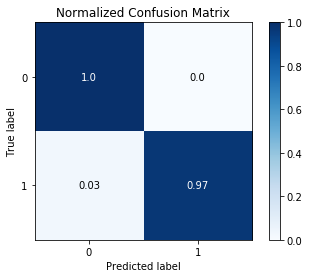

In [52]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_RF, normalize = True)

In [53]:
print('Area under the ROC curve:',"% 1.3f" % roc_auc_score(y_test,y_pred_RF))

Area under the ROC curve:  0.987


In [54]:
print('Log Loss: %1.3f' % log_loss(y_test,y_pred_RF))

Log Loss: 0.331


In [55]:
x = X_train.columns

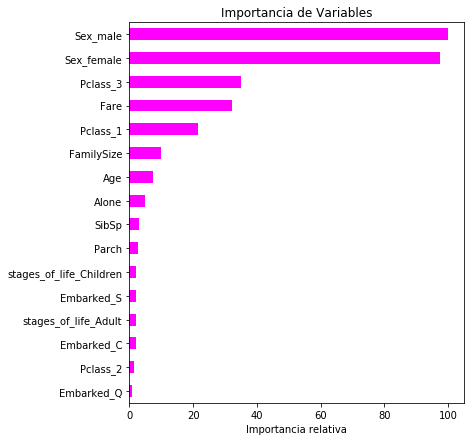

In [56]:
#DF de variables mas importantes
f_imp = pd.DataFrame(clf.feature_importances_,
                     index=x, columns=['imp'])
#calculo de importancia relativa
f_imp['imp_rel'] = (f_imp/f_imp.max()*100)
#plot de importancia de variables
f_imp.sort_values('imp_rel',ascending=True).imp_rel.plot.barh(figsize=(6,7),
                                                              title='Importancia de Variables',color='magenta')
plt.xlabel('Importancia relativa');


Clearly this method noy only performs better than Logistic Regression, but also give us insights about the data. 

### Supported Vector Machine

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [58]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,y_train)

y_pred_SVM = classifier.predict(X_test)

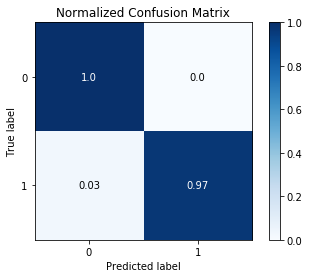

In [59]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_SVM, normalize = True)

In [60]:
print('Area bajo la curva ROC:',"% 1.3f" % roc_auc_score(y_test,y_pred_SVM))

Area bajo la curva ROC:  0.987


In [61]:
print('Log Loss: %1.3f' % log_loss(y_test,y_pred_SVM))

Log Loss: 0.331


SVM performs quite well on this dataset.

## Ensemble Learning

In [62]:
y_pred = (y_pred_RF + y_pred_SVM) / 2

In [63]:
y_pred = np.where(y_pred < 0.5, 0,1)

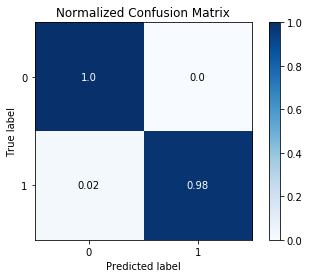

In [64]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize = True)

In [65]:
print('Area under the ROC curve:',"% 1.3f" % roc_auc_score(y_test,y_pred))

Area under the ROC curve:  0.990


In [66]:
print('Log Loss: %1.3f' % log_loss(y_test,y_pred))

Log Loss: 0.248


So we improved the model a few by Ensemble Learning.

Let's convert our predictions to csv in order to submit our answer to Kaggle:

In [67]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':y_pred})
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [68]:
filename = 'Titanic_Predictions.csv'

submission.to_csv(filename,index=False)